In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

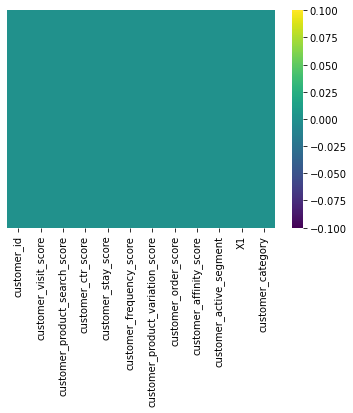

In [38]:
train =pd.read_csv(r"train.csv")
train.dropna(inplace=True)
train.isnull().sum()
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',)


<AxesSubplot:>

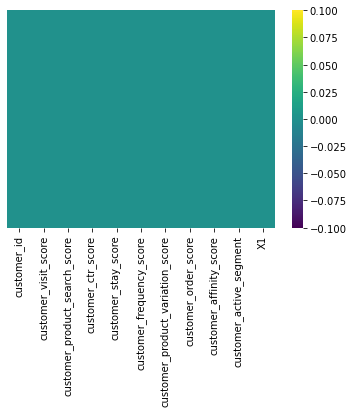

In [39]:
test =pd.read_csv(r"test.csv")
test.dropna(inplace=True)
test.isnull().sum()
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis',)
#

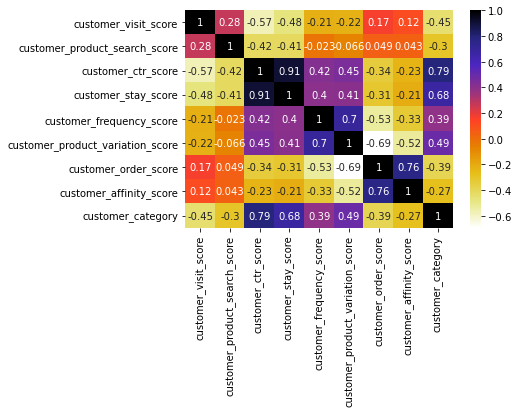

In [40]:
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

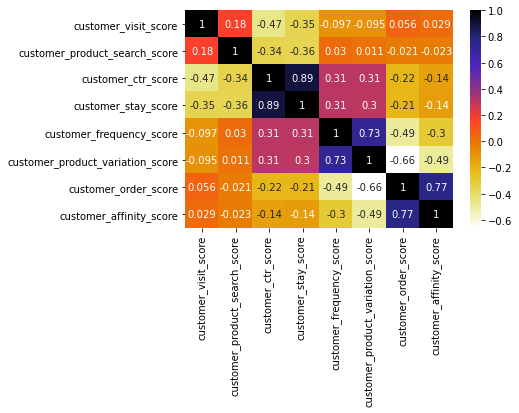

In [41]:
cor_test = test.corr()
sns.heatmap(cor_test, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [42]:
threshold =0.8
col_corr = set()  # Set of all the names of correlated columns
corr_matrix = test.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
print(col_corr)

{'customer_stay_score'}


In [43]:
#sns.boxplot(x='customer_category' ,y='customer_stay_score',data=train)

In [44]:
train.drop(['X1','customer_id'],axis=1,inplace=True)

test.drop(['X1','customer_id'],axis=1,inplace=True)

In [45]:
train.drop(['customer_active_segment'],axis=1,inplace=True)

test.drop(['customer_active_segment'],axis=1,inplace=True)

In [46]:
x_train =train.drop('customer_category',axis=1)
y_train=train['customer_category']

x_test =train.drop('customer_category',axis=1)
y_test=train['customer_category']

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

logmodel.fit(x_train,y_train)

LogisticRegression()

In [48]:
pre =logmodel.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
d =pd.DataFrame()
d =classification_report(y_test,pre)
print(d)
confusion_matrix(y_test,pre)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9222
           1       0.95      0.81      0.88      1269

    accuracy                           0.97     10491
   macro avg       0.96      0.90      0.93     10491
weighted avg       0.97      0.97      0.97     10491



array([[9173,   49],
       [ 236, 1033]], dtype=int64)